In [18]:
import seaborn as sns
# this cell must be executed AFTER all the others, so that the variables are already set!
display(Markdown("""
# COVID-19 statistics in Italy
## Last Updated: {last_date}
This is a basic analysis of the spread of the COVID-19 Coronavirus disease in Italy.

Data is sourced from the [github repo](https://github.com/pcm-dpc/COVID-19) of the Italian Civil Protection Department, which is updated on a daily basis.

Below are provided graphs, with regional breakdown, of the following parameters:
- TotalPositiveCases
- TotalHospitalizedPatients
- Deaths
- TestsPerformed

as well as two maps showing the geolocation of the cases at both regional and provincial level.

Here follow two lists:
- Italian regions in descending order of cases
- top 20 provinces in descending order of cases
""".format(last_date=last_date)))
cm = sns.light_palette("red", as_cmap=True)
italy_region_cluster.sort_values(by='TotalPositiveCases', ascending=False)[['RegionName', 'TotalPositiveCases']].style.background_gradient(cmap=cm).hide_index()


# COVID-19 statistics in Italy
## Last Updated: 2020-03-24 17:00:00
This is a basic analysis of the spread of the COVID-19 Coronavirus disease in Italy.

Data is sourced from the [github repo](https://github.com/pcm-dpc/COVID-19) of the Italian Civil Protection Department, which is updated on a daily basis.

Below are provided graphs, with regional breakdown, of the following parameters:
- TotalPositiveCases
- TotalHospitalizedPatients
- Deaths
- TestsPerformed

as well as two maps showing the geolocation of the cases at both regional and provincial level.

Here follow two lists:
- Italian regions in descending order of cases
- top 20 provinces in descending order of cases


RegionName,TotalPositiveCases
Lombardia,30703
Emilia Romagna,9254
Veneto,5948
Piemonte,5515
Marche,2736
Toscana,2699
Liguria,2116
Lazio,1728
P.A. Trento,1110
Campania,1101


In [19]:
italy_province_cluster.sort_values(by='TotalPositiveCases', ascending=False)[['RegionName', 'ProvinceName', 'TotalPositiveCases']][:20].style.background_gradient(cmap=cm).hide_index()

RegionName,ProvinceName,TotalPositiveCases
Lombardia,Bergamo,6728
Lombardia,Brescia,6298
Lombardia,Milano,5701
Lombardia,Cremona,3061
Piemonte,Torino,2496
Emilia Romagna,Piacenza,1981
Lombardia,Lodi,1860
Lombardia,Pavia,1499
Veneto,Padova,1464
Lombardia,Monza e della Brianza,1454


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from IPython.display import Markdown
import folium
# may require pip install folium
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
DATA_FILES_DIR = './data/'
OUTPUT_CHARTS_DIR = './charts/'

if not os.path.exists(DATA_FILES_DIR):
    print(f'ERROR: cannot find dir {DATA_FILES_DIR}')
if not os.path.exists(OUTPUT_CHARTS_DIR):
    os.makedirs(OUTPUT_CHARTS_DIR)

In [5]:
italy_region_data_cols = ['data', 'denominazione_regione', 'totale_ospedalizzati', 'totale_casi', 'deceduti', 'tamponi']      

italy_region = pd.read_csv("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv", 
                           usecols=italy_region_data_cols)
italy_region = italy_region.rename(columns={'data': 'Date', 'denominazione_regione': 'RegionName', 
                                            'totale_ospedalizzati': 'TotalHospitalizedPatients',
                                            'totale_casi': 'TotalPositiveCases', 'deceduti': 'Deaths', 
                                            'tamponi': 'TestsPerformed'})
italy_region['Date']= pd.to_datetime(italy_region['Date'])

In [6]:
first_date = italy_region['Date'].min()
last_date = italy_region['Date'].max()
print(f"Dates: {first_date} - {last_date}")
print(f'{italy_region.shape} samples, attributes')
italy_region.describe().T

Dates: 2020-02-24 18:00:00 - 2020-03-24 17:00:00
(630, 6) samples, attributes


,count,mean,std,min,25%,50%,75%,max
TotalHospitalizedPatients,630.0,394.149206,1251.839478,0.0,2.00,33.0,209.0,10905.0
Deaths,630.0,74.665079,355.858845,0.0,0.00,1.0,17.0,4178.0
TotalPositiveCases,630.0,911.466667,3042.363004,0.0,7.25,82.5,522.5,30703.0
TestsPerformed,630.0,4509.487302,10411.666143,0.0,122.25,783.5,3672.0,76695.0


In [7]:
# RegionName is irrelevant for the max statistics
italy_region[filter(lambda col : col != 'RegionName', italy_region.columns)].max()

Date                         2020-03-24 17:00:00
TotalHospitalizedPatients                  10905
Deaths                                      4178
TotalPositiveCases                         30703
TestsPerformed                             76695
dtype: object

In [8]:
display(Markdown("""
### Legend order
We want the legend to follow the descending order of the particular stat that we are charting (at {last_date}). 
""".format(last_date=last_date)))


### Legend order
We want the legend to follow the descending order of the particular stat that we are charting (at 2020-03-24 17:00:00). 


In [9]:
# this is the order that we want for the stat TotalPositiveCases
italy_region[italy_region['Date']==last_date].sort_values(by='TotalPositiveCases', ascending=False)['RegionName']

618                Lombardia
614           Emilia Romagna
629                   Veneto
621                 Piemonte
619                   Marche
625                  Toscana
617                  Liguria
616                    Lazio
626              P.A. Trento
613                 Campania
622                   Puglia
615    Friuli Venezia Giulia
624                  Sicilia
611             P.A. Bolzano
609                  Abruzzo
627                   Umbria
623                 Sardegna
628            Valle d'Aosta
612                 Calabria
610               Basilicata
620                   Molise
Name: RegionName, dtype: object

# Statistics per region

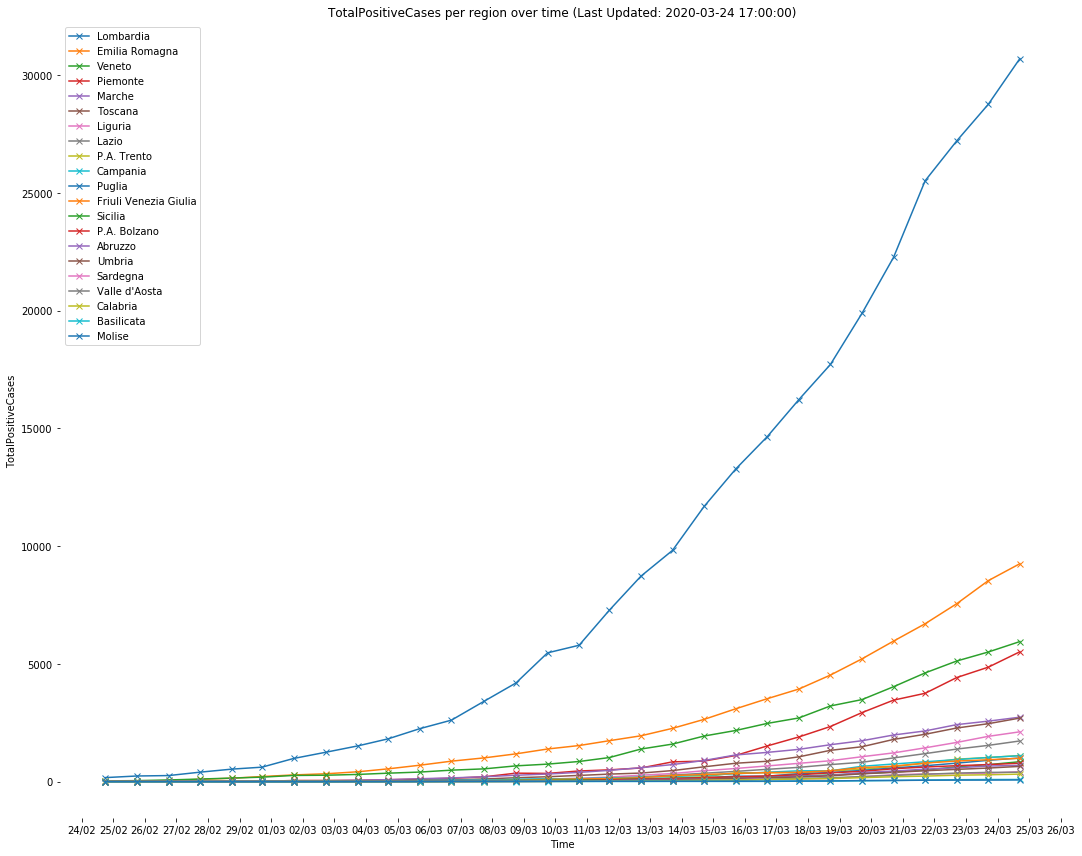

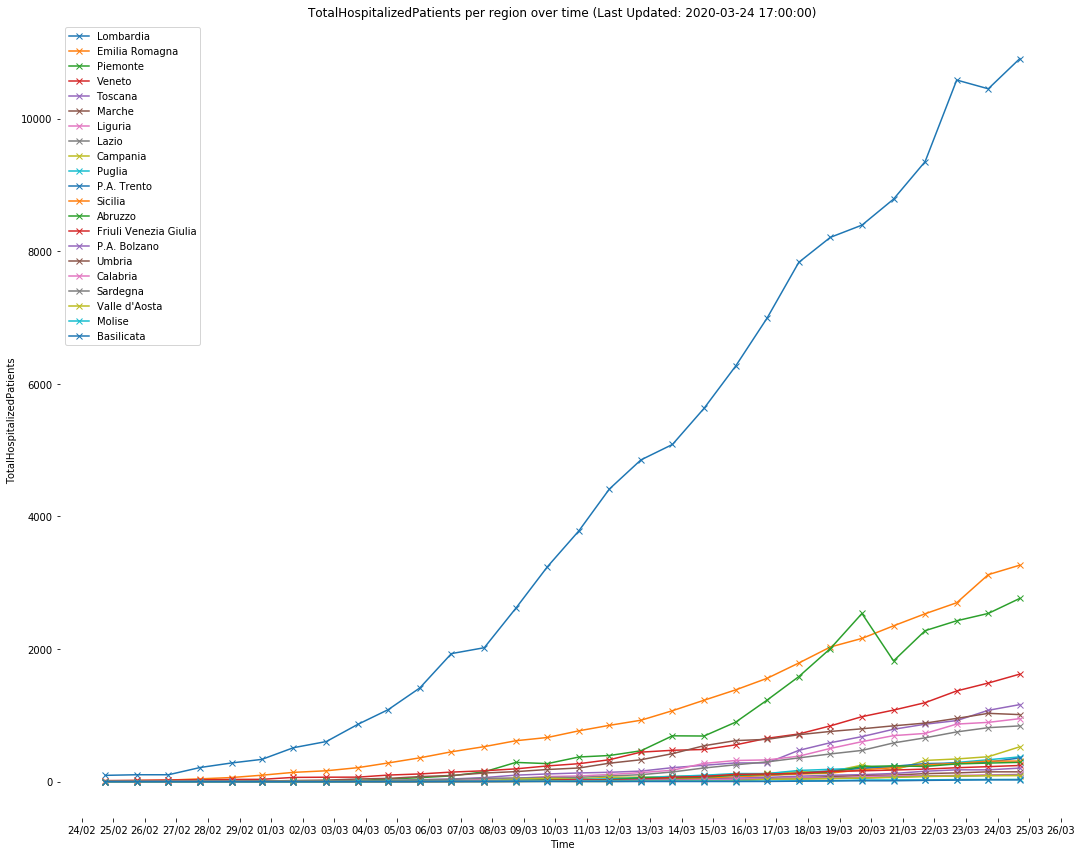

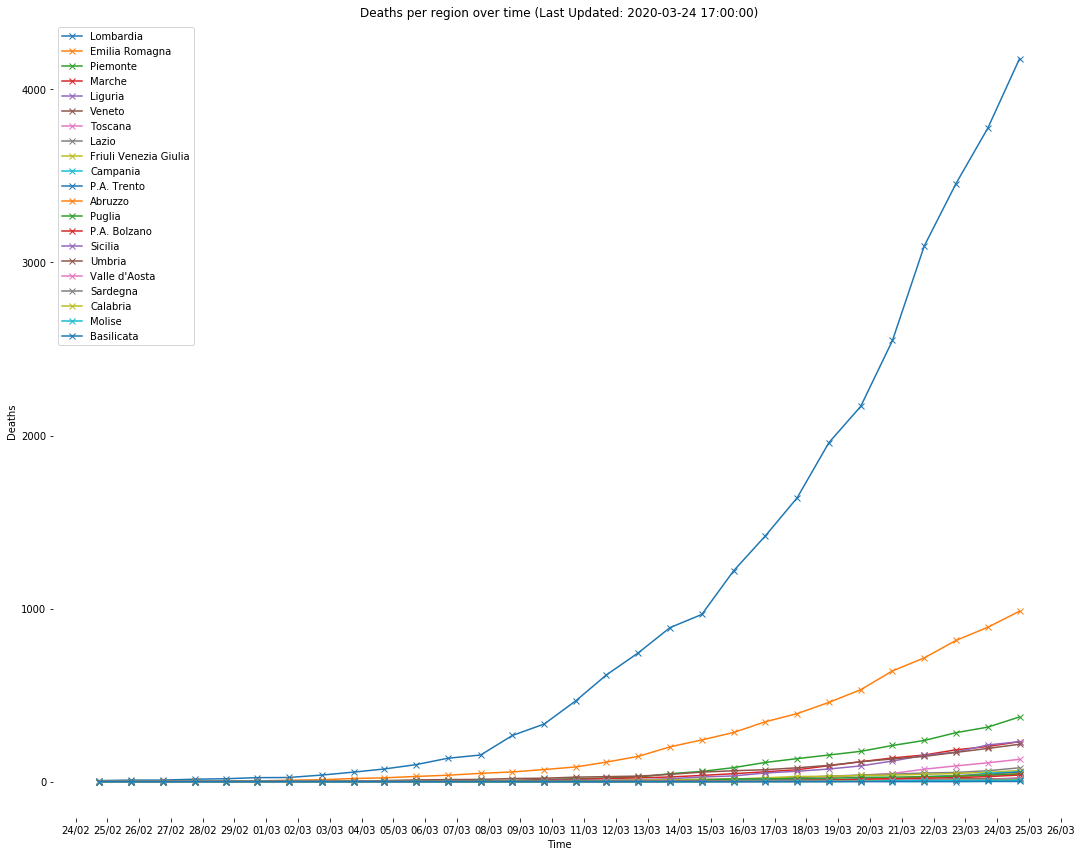

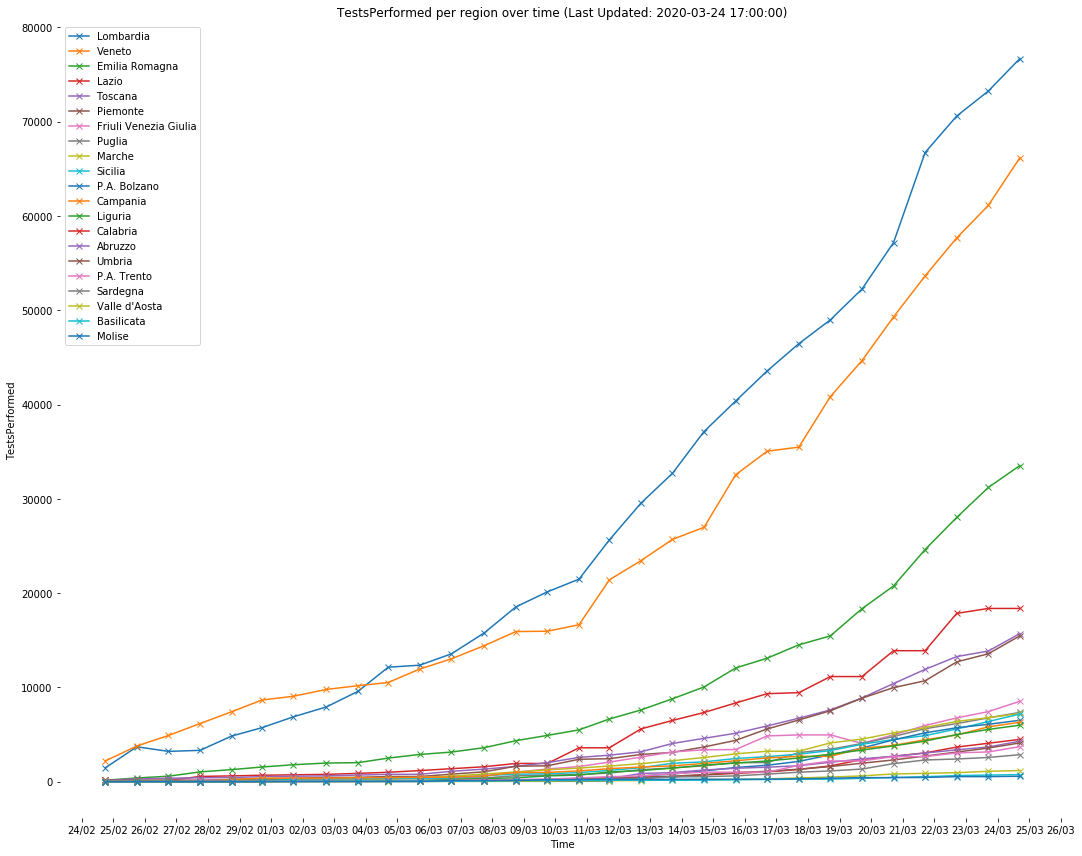

In [10]:
for stat in ['TotalPositiveCases', 'TotalHospitalizedPatients', 'Deaths', 'TestsPerformed']:
    plt.figure(figsize=(15, 12))
    for region in italy_region[italy_region['Date']==last_date].sort_values(by=stat, ascending=False)['RegionName']:
        plt.plot(italy_region[italy_region['RegionName'] == region]['Date'], 
                 italy_region[italy_region['RegionName'] == region][stat],
                 label=region,
                 marker='x')
    plt.xlabel('Time')
    plt.ylabel(f'{stat}')
    plt.title(f'{stat} per region over time (Last Updated: {last_date})')
    plt.legend()
    plt.box(False)
    plt.tight_layout()
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
    plt.savefig(f'{OUTPUT_CHARTS_DIR}ita_region_{stat}.png', dpi=300)

In [11]:
italy_region_cluster_cols = ['data', 'denominazione_regione', 'totale_casi', 'lat', 'long']     

italy_region_cluster = pd.read_csv("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv", 
                                   usecols=italy_region_cluster_cols)
italy_region_cluster = italy_region_cluster.rename(columns={'data': 'Date', 'denominazione_regione': 'RegionName', 
                                            'totale_casi': 'TotalPositiveCases', 
                                            'lat': 'Latitude', 
                                            'long': 'Longitude'})
italy_region_cluster['Date'] = pd.to_datetime(italy_region_cluster['Date'])
italy_region_cluster = italy_region_cluster[italy_region_cluster['Date']==last_date]

# Regional geolocation

In [12]:
italy_map = folium.Map(location=[42.8719, 12.5674], zoom_start=5, tiles='Stamen Toner')

for region, lat, lon, count in zip(italy_region_cluster['RegionName'], italy_region_cluster['Latitude'], 
                                   italy_region_cluster['Longitude'], italy_region_cluster['TotalPositiveCases']):
    folium.CircleMarker([lat, lon],
                        radius=count/500,
                        color='red',
                        popup=f'RegionName: {region}<br>TotalPositiveCases: {count}<br>',
                        fill_color='red',
                        fill_opacity=0.7).add_to(italy_map)

italy_map

In [13]:
italy_province_cluster_cols = ['data', 'denominazione_regione', 'denominazione_provincia', 'totale_casi', 'lat', 'long']      

italy_province_cluster = pd.read_csv("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province.csv", 
                                     usecols=italy_province_cluster_cols)
italy_province_cluster = italy_province_cluster.rename(columns={'data': 'Date', 'denominazione_regione': 'RegionName',
                                            'denominazione_provincia': 'ProvinceName',
                                            'totale_casi': 'TotalPositiveCases', 
                                            'lat': 'Latitude', 
                                            'long': 'Longitude'})
italy_province_cluster['Date'] = pd.to_datetime(italy_province_cluster['Date'])

# Statistics per province (only top 10 provinces per TotalPositiveCases)

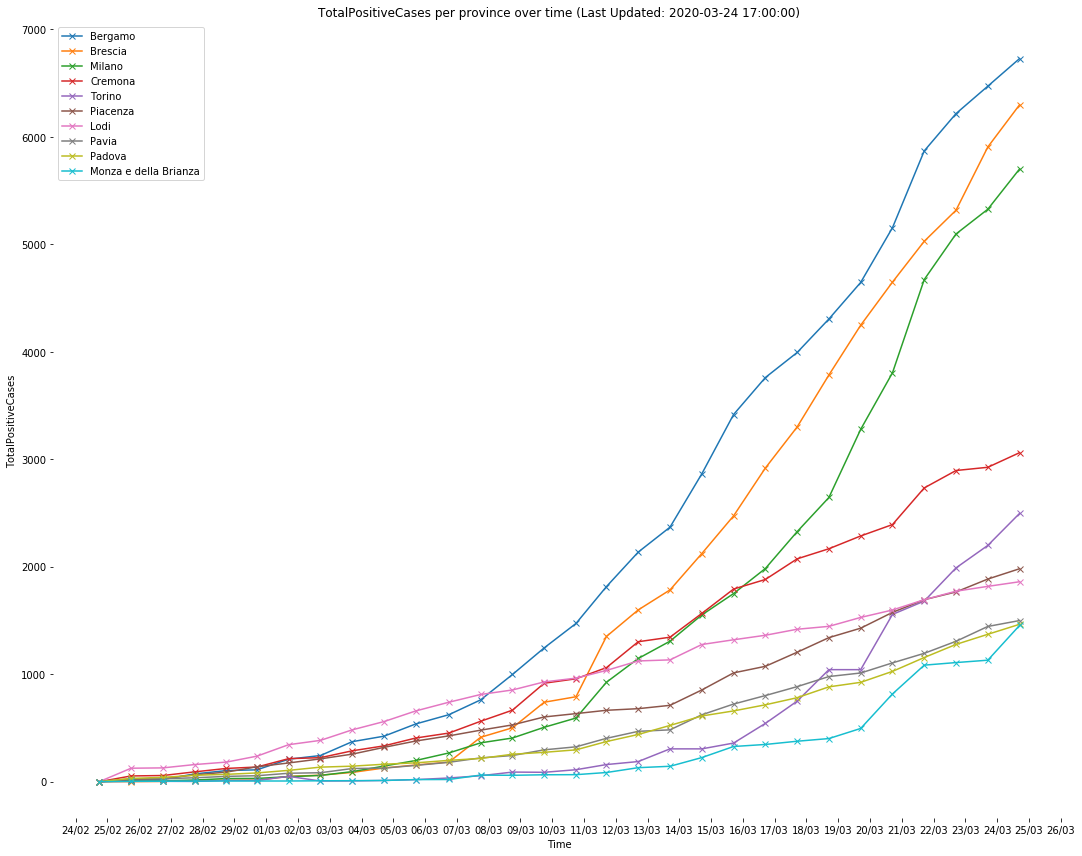

In [14]:
plt.figure(figsize=(15, 12))
for province in italy_province_cluster[italy_province_cluster['Date']==last_date].sort_values(by='TotalPositiveCases', ascending=False)['ProvinceName'][:10]:
    plt.plot(italy_province_cluster[italy_province_cluster['ProvinceName'] == province]['Date'], 
             italy_province_cluster[italy_province_cluster['ProvinceName'] == province]['TotalPositiveCases'],
             label=province,
             marker='x')
plt.xlabel('Time')
plt.ylabel(f'TotalPositiveCases')
plt.title(f'TotalPositiveCases per province over time (Last Updated: {last_date})')
plt.legend()
plt.box(False)
plt.tight_layout()
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
plt.savefig(f'{OUTPUT_CHARTS_DIR}ita_province_TotalPositiveCases.png', dpi=300)

## Compare top 10 province with an interactively selected one

In [15]:
from ipywidgets import interact

'''
The provinces to be shown in the drop-down list are the ones that satisfy the following conditions:
- they are not in the top 10
- the associated Latitude is not 0.0 (as with the "In fase di definizione/aggiornamento" cases, basically a Work-In-Progress)
- they have at least 1 case
'''
available_provinces = italy_province_cluster[italy_province_cluster['Date']==last_date].sort_values(by='TotalPositiveCases', ascending=False)[['Latitude', 'ProvinceName', 'TotalPositiveCases']][10:]
available_provinces = available_provinces[(available_provinces['Latitude']!=0.0) & \
                                          (available_provinces['TotalPositiveCases']!=0.0)]\
                           .sort_values(by='ProvinceName')['ProvinceName']

@interact
def show_selected_province(province=available_provinces):
    plt.figure(figsize=(15, 12))
    for top10prov in italy_province_cluster[italy_province_cluster['Date']==last_date].sort_values(by='TotalPositiveCases', ascending=False)['ProvinceName'][:10]:
        plt.plot(italy_province_cluster[italy_province_cluster['ProvinceName'] == top10prov]['Date'], 
                 italy_province_cluster[italy_province_cluster['ProvinceName'] == top10prov]['TotalPositiveCases'],
                 label=top10prov,
                 alpha=0.5,
                 marker='x')
    plt.plot(italy_province_cluster[italy_province_cluster['ProvinceName'] == province]['Date'], 
             italy_province_cluster[italy_province_cluster['ProvinceName'] == province]['TotalPositiveCases'],
             label=province,
             marker='x')        
    plt.xlabel('Time')
    plt.ylabel(f'TotalPositiveCases')
    plt.title(f'TotalPositiveCases per province over time (Last Updated: {last_date})')
    plt.legend()
    plt.box(False)
    plt.tight_layout()
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))    

interactive(children=(Dropdown(description='province', options=('Agrigento', 'Alessandria', 'Ancona', 'Aosta',…

In [16]:
italy_province_cluster = italy_province_cluster[(italy_province_cluster['Date']==last_date) & 
                                                 (italy_province_cluster['Latitude']!=0.0) &
                                                 (italy_province_cluster['TotalPositiveCases']!=0.0)]

# Provincial geolocation

In [17]:
italy_map = folium.Map(location=[42.8719, 12.5674], zoom_start=5, tiles='Stamen Toner')

for region, province, lat, lon, count in zip(italy_province_cluster['RegionName'], 
                                             italy_province_cluster['ProvinceName'],
                                             italy_province_cluster['Latitude'], 
                                             italy_province_cluster['Longitude'], 
                                             italy_province_cluster['TotalPositiveCases']):
    folium.CircleMarker([lat, lon],
                        radius=count/200,
                        color='red',
                        popup=f'RegionName: {region}<br>ProvinceName: {province}<br>TotalPositiveCases: {count}<br>',
                        fill_color='red',
                        fill_opacity=0.7).add_to(italy_map)

italy_map